In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('sxof_data.csv', sep=';', index_col=0)

In [16]:
data.head()

,region,sex,age,income,isMarried,nchildren,religious,education,occupation,rate_marriage,naffairs
id,,,,,,,,,,,
1,3,1,37,"563680,0625",1,0,3,18,5,4,0
2,1,0,27,"270797,5938",0,0,4,14,1,1,0
3,3,0,32,"365333,3438",0,1,1,12,1,1,0
4,1,1,57,"563680,0625",1,1,5,18,1,5,0
5,2,1,22,"253485,5938",0,0,2,17,3,1,0


In [18]:
data['income'] = data['income'].apply(lambda x: x.replace(',', '.')).astype(np.float64)

In [25]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 1 to 601
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         601 non-null    int64  
 1   sex            601 non-null    int64  
 2   age            601 non-null    int64  
 3   income         601 non-null    float64
 4   isMarried      601 non-null    int64  
 5   nchildren      601 non-null    int64  
 6   religious      601 non-null    int64  
 7   education      601 non-null    int64  
 8   occupation     601 non-null    int64  
 9   rate_marriage  601 non-null    int64  
 10  naffairs       601 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 56.3 KB


(None,
            region         sex         age        income   isMarried  \
 count  601.000000  601.000000  601.000000  6.010000e+02  601.000000   
 mean     2.001664    0.475874   32.582363  3.794328e+05    0.507488   
 std      0.823608    0.499834    9.182971  2.699736e+05    0.500360   
 min      1.000000    0.000000   22.000000  2.274890e+04    0.000000   
 25%      1.000000    0.000000   27.000000  1.974000e+05    0.000000   
 50%      2.000000    0.000000   32.000000  2.932424e+05    1.000000   
 75%      3.000000    1.000000   37.000000  4.838200e+05    1.000000   
 max      3.000000    1.000000   57.000000  2.194300e+06    1.000000   
 
         nchildren   religious   education  occupation  rate_marriage  \
 count  601.000000  601.000000  601.000000  601.000000     601.000000   
 mean     0.715474    3.116473   16.166389    2.988353       2.470882   
 std      0.451564    1.167509    2.402555    1.425318       1.669202   
 min      0.000000    1.000000    9.000000    1.000

In [26]:
import seaborn as sns

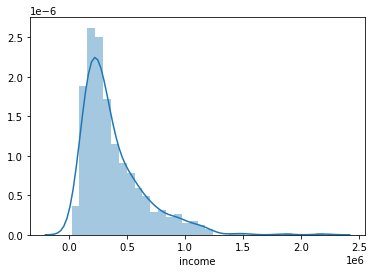

In [35]:
sns.distplot(data['income']);

https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93

http://www.psychwiki.com/wiki/How_do_I_determine_whether_my_data_are_normal%3F

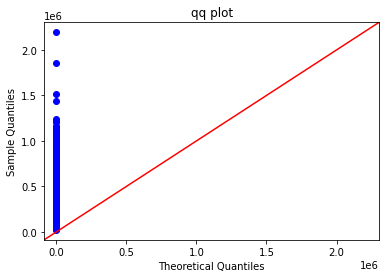

In [34]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab


sm.qqplot(data['income'], line='45')
plt.title("qq plot");

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [39]:
from scipy.stats import kstest

ks_statistic, p_value = kstest(data['income'], 'norm')
print(ks_statistic, p_value)

1.0 0.0


https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.lilliefors.html

In [41]:
from statsmodels.stats.diagnostic import lilliefors

lilliefors(data['income'], pvalmethod='table')

(0.14930315244699044, 0.0009999999999998899)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [43]:
from scipy.stats import shapiro

shapiro(data['income'])

ShapiroResult(statistic=0.8353692889213562, pvalue=2.0044760358591868e-24)

https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810

In [62]:
mu = data['income'].mean()
std = data['income'].std()

from numpy.random import normal

normal_sample = normal(mu, std, size=data.shape[0])

In [63]:
from scipy.special import kl_div

divs = kl_div(data['income'], normal_sample)
np.sum(np.where(divs != np.inf, divs, 0))

88012417.04115635